In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from numba import njit
from heston_lsm_utils import simulate_heston_paths, simulate_bs_paths, least_squares_monte_carlo, heston_simulations, bs_simulations, generate_correlated_BMs
from scipy.stats import ttest_rel


In [ ]:
# Parameters 
np.random.seed(200)
S0 = 100
K = 100
T = 1
r = 0.05
kappa = 2.0
theta = 0.04
sigma = 0.2
rho = 0.5
v0 = 0.04
M = 100
N = 1000
num_simulations = 100

# --- Loop over theta, sigma, S0, and rho ---
theta_values = [0.04, 0.1, 0.25, 0.5]
sigma_values = [0.1, 0.2, 0.3]
rho_values = [-0.9, 0.0, 0.5, 0.9]
S0_values = [95, 100, 105]
time_grid = np.linspace(0, T, M + 1)


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1mNo implementation of function Function(<built-in method randn of numpy.random.mtrand.RandomState object at 0x1059f3840>) found for signature:
 
 >>> randn(array(float64, 2d, C), array(float64, 2d, C))
 
There are 2 candidate implementations:
[1m   - Of which 2 did not match due to:
   Overload in function 'randn': File: numba/cpython/randomimpl.py: Line 1896.
     With argument(s): '(array(float64, 2d, C), array(float64, 2d, C))':[0m
[1m    Rejected as the implementation raised a specific error:
      TypingError: Failed in nopython mode pipeline (step: nopython frontend)
    [1m[1m[1mNo implementation of function Function(<built-in method standard_normal of numpy.random.mtrand.RandomState object at 0x1059f3840>) found for signature:
     
     >>> standard_normal(StarArgUniTuple(array(float64, 2d, C) x 2))
     
    There are 4 candidate implementations:
    [1m      - Of which 2 did not match due to:
          Overload in function 'np_gauss_impl0': File: numba/cpython/randomimpl.py: Line 287.
            With argument(s): '(StarArgUniTuple(array(float64, 2d, C) x 2))':[0m
    [1m       Rejected as the implementation raised a specific error:
             TypingError: [1mtoo many positional arguments[0m[0m
      raised from /opt/anaconda3/lib/python3.12/site-packages/numba/core/typing/templates.py:783
    [1m      - Of which 2 did not match due to:
          Overload of function 'standard_normal': File: numba/cpython/randomimpl.py: Line 312.
            With argument(s): '(StarArgUniTuple(array(float64, 2d, C) x 2))':[0m
    [1m       No match.[0m
    [0m
    [0m[1mDuring: resolving callee type: Function(<built-in method standard_normal of numpy.random.mtrand.RandomState object at 0x1059f3840>)[0m
    [0m[1mDuring: typing of call at /opt/anaconda3/lib/python3.12/site-packages/numba/cpython/randomimpl.py (1906)
    [0m
    [1m
    File "../../../../../../../opt/anaconda3/lib/python3.12/site-packages/numba/cpython/randomimpl.py", line 1906:[0m
    [1m        def randn_impl(*size):
    [1m            return np.random.standard_normal(size)
    [0m            [1m^[0m[0m
[0m
  raised from /opt/anaconda3/lib/python3.12/site-packages/numba/core/typeinfer.py:1091
[0m
[0m[1mDuring: resolving callee type: Function(<built-in method randn of numpy.random.mtrand.RandomState object at 0x1059f3840>)[0m
[0m[1mDuring: typing of call at /Users/jvander/Documents/Uni/10. Sem/AF/Code/heston_lsm_utils.py (7)
[0m
[1m
File "heston_lsm_utils.py", line 7:[0m
[1mdef generate_correlated_BMs(N, M, rho):
[1m    Z1 = np.random.randn(N, M)
[0m    [1m^[0m[0m


In [ ]:

# --- Loop over theta, sigma, S0, and rho ---
theta_values = [0.04, 0.1, 0.25, 0.5]
sigma_values = [0.1, 0.2, 0.3]
rho_values = [-0.9, 0.0, 0.5, 0.9]
time_grid = np.linspace(0, T, M + 1)

# --- Test: effect of theta ---
plt.figure(figsize=(10, 6))
for th in theta_values:
    boundaries = []
    for _ in range(num_simulations):
        S, _ = simulate_heston_paths(S0, th, kappa, th, sigma, r, rho, T, M, N)
        _, _, boundary = least_squares_monte_carlo(S, K, r, T, M, track_boundary=True)
        boundaries.append(boundary)
    avg_boundary = np.nanmean(boundaries, axis=0)
    plt.plot(time_grid, avg_boundary, label=f"Heston, θ={th}")
plt.title("Early Exercise Boundary for Different θ")
plt.xlabel("Time")
plt.ylabel("Boundary")
plt.legend()
plt.grid(True)
plt.show()

# --- Test: effect of sigma ---
plt.figure(figsize=(10, 6))
for sig in sigma_values:
    boundaries = []
    for _ in range(num_simulations):
        S, _ = simulate_heston_paths(S0, v0, kappa, theta, sig, r, rho, T, M, N)
        _, _, boundary = least_squares_monte_carlo(S, K, r, T, M, track_boundary=True)
        boundaries.append(boundary)
    avg_boundary = np.nanmean(boundaries, axis=0)
    plt.plot(time_grid, avg_boundary, label=f"Heston, σ={sig}")
plt.title("Early Exercise Boundary for Different σ")
plt.xlabel("Time")
plt.ylabel("Boundary")
plt.legend()
plt.grid(True)
plt.show()

# --- Test: effect of rho ---
plt.figure(figsize=(10, 6))
for rh in rho_values:
    boundaries = []
    for _ in range(num_simulations):
        S, _ = simulate_heston_paths(S0, v0, kappa, theta, sigma, r, rh, T, M, N)
        _, _, boundary = least_squares_monte_carlo(S, K, r, T, M, track_boundary=True)
        boundaries.append(boundary)
    avg_boundary = np.nanmean(boundaries, axis=0)
    plt.plot(time_grid, avg_boundary, label=f"Heston, ρ={rh}")
plt.title("Early Exercise Boundary for Different ρ")
plt.xlabel("Time")
plt.ylabel("Boundary")
plt.legend()
plt.grid(True)
plt.show()


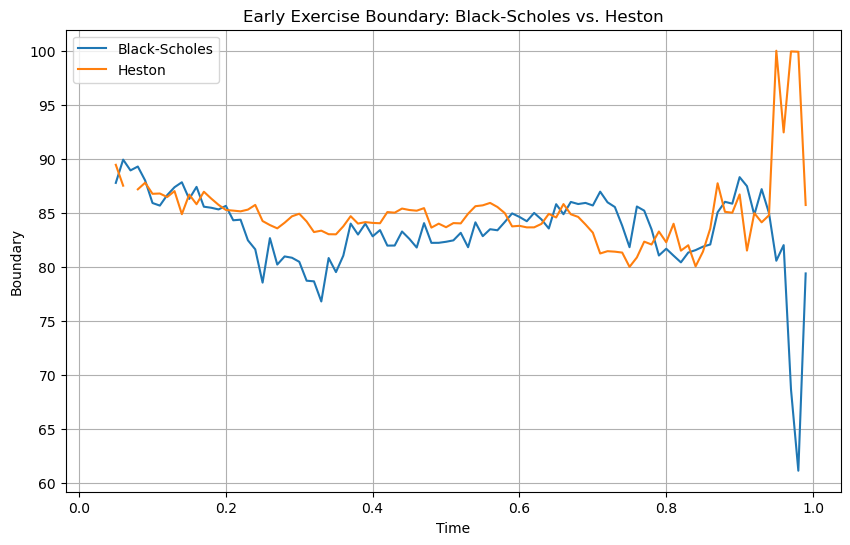

In [56]:
# Simulate Black-Scholes paths
np.random.seed(200)
S_bs = simulate_bs_paths(S0, np.sqrt(theta), r, T, M, N)
price_bs, freq_bs, boundary_bs = least_squares_monte_carlo(S_bs, K, r, T, M, track_boundary=True)

# Simulate Heston paths
S_heston, _ = simulate_heston_paths(S0, v0, kappa, theta, sigma, r, rho, T, M, N)
price_heston, freq_heston, boundary_heston = least_squares_monte_carlo(S_heston, K, r, T, M, track_boundary=True)

# Plot boundary comparison
plt.figure(figsize=(10, 6))
plt.plot(time_grid, boundary_bs, label="Black-Scholes")
plt.plot(time_grid, boundary_heston, label="Heston")
plt.title("Early Exercise Boundary: Black-Scholes vs. Heston")
plt.xlabel("Time")
plt.ylabel("Boundary")
plt.legend()
plt.grid(True)
plt.show()
